In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [50]:
path = r"C:\Users\Arifin\Downloads\papaya\Combined_Leaf&Fruit.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1.749893,3.062899,2.222365,3.068743,0.881938,0.789928,0.836790,0.792888,0.569768,0.518929,0.542852,0.520702,0.834022,0.709144,0.789176,0.708593,Fresh Papaya Leaf
1,1,0.973958,2.050565,1.597426,2.108881,0.973505,0.945987,0.952730,0.943764,0.755846,0.748174,0.751231,0.747684,0.982222,0.962667,0.970842,0.961605,Fresh Papaya Leaf
2,2,1.148805,2.764168,2.277512,2.787666,0.976294,0.945290,0.951699,0.944618,0.794646,0.785001,0.788239,0.785123,0.972863,0.934894,0.946200,0.934341,Fresh Papaya Leaf
3,3,0.663358,1.131642,0.800123,1.190235,0.984407,0.973292,0.979534,0.971856,0.652971,0.646309,0.650120,0.645156,0.979113,0.964460,0.974811,0.962620,Fresh Papaya Leaf
4,4,0.445312,0.772580,0.490074,0.743545,0.985087,0.972965,0.979264,0.972545,0.663605,0.655566,0.659423,0.655110,0.981232,0.967533,0.979352,0.968754,Fresh Papaya Leaf


In [51]:
df = df.rename(columns={'16': 'Class'})
features = df.drop('Class',axis=1)

In [52]:
df.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  406 non-null    int64  
 1   0           406 non-null    float64
 2   1           406 non-null    float64
 3   2           406 non-null    float64
 4   3           406 non-null    float64
 5   4           406 non-null    float64
 6   5           406 non-null    float64
 7   6           406 non-null    float64
 8   7           406 non-null    float64
 9   8           406 non-null    float64
 10  9           406 non-null    float64
 11  10          406 non-null    float64
 12  11          406 non-null    float64
 13  12          406 non-null    float64
 14  13          406 non-null    float64
 15  14          406 non-null    float64
 16  15          406 non-null    float64
 17  Class       406 non-null    object 
dtypes: float64(16), int64(1), object(1)
memory usage: 57.2+ KB


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1.749893,3.062899,2.222365,3.068743,0.881938,0.789928,0.836790,0.792888,0.569768,0.518929,0.542852,0.520702,0.834022,0.709144,0.789176,0.708593
1,1,0.973958,2.050565,1.597426,2.108881,0.973505,0.945987,0.952730,0.943764,0.755846,0.748174,0.751231,0.747684,0.982222,0.962667,0.970842,0.961605
2,2,1.148805,2.764168,2.277512,2.787666,0.976294,0.945290,0.951699,0.944618,0.794646,0.785001,0.788239,0.785123,0.972863,0.934894,0.946200,0.934341
3,3,0.663358,1.131642,0.800123,1.190235,0.984407,0.973292,0.979534,0.971856,0.652971,0.646309,0.650120,0.645156,0.979113,0.964460,0.974811,0.962620
4,4,0.445312,0.772580,0.490074,0.743545,0.985087,0.972965,0.979264,0.972545,0.663605,0.655566,0.659423,0.655110,0.981232,0.967533,0.979352,0.968754


In [53]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
  
scaler = MinMaxScaler()
  
scaler.fit(features)
features = scaler.transform(features)
  
df_feat = pd.DataFrame(features, columns = df.columns[:-1])
df_feat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,0.152142,0.239744,0.216603,0.248402,0.767594,0.636136,0.530312,0.645433,0.376727,0.311422,0.346022,0.320881,0.551579,0.428240,0.454752,0.448025
1,0.003460,0.070648,0.143334,0.146011,0.154145,0.971810,0.944258,0.899866,0.939523,0.846816,0.854810,0.850998,0.855453,0.986103,0.966553,0.948702,0.960621
2,0.006920,0.089012,0.211294,0.222832,0.220801,0.978030,0.942883,0.896578,0.941186,0.944834,0.942104,0.940682,0.943626,0.958660,0.907582,0.881699,0.905384
3,0.010381,0.038027,0.055819,0.055950,0.063936,0.996125,0.998169,0.985303,0.994278,0.586923,0.613356,0.605972,0.613984,0.976987,0.970360,0.959492,0.962677
4,0.013841,0.015127,0.021623,0.020927,0.020072,0.997641,0.997523,0.984442,0.995622,0.613788,0.635298,0.628515,0.637428,0.983201,0.976886,0.971839,0.975105


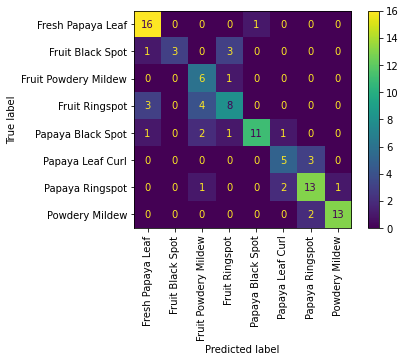

In [54]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
      features, df['Class'], test_size = 0.25, random_state=None)
  
# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.

from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(n_neighbors = 1)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test)
plt.xticks(rotation = 90)
plt.show()

# Predictions and Evaluations
# Let's evaluate our KNN model ! 


In [55]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))


                      precision    recall  f1-score   support

   Fresh Papaya Leaf       0.76      0.94      0.84        17
    Fruit Black Spot       1.00      0.43      0.60         7
Fruit Powdery Mildew       0.46      0.86      0.60         7
      Fruit Ringspot       0.62      0.53      0.57        15
   Papaya Black Spot       0.92      0.69      0.79        16
    Papaya Leaf Curl       0.62      0.62      0.62         8
     Papaya Ringspot       0.72      0.76      0.74        17
      Powdery Mildew       0.93      0.87      0.90        15

            accuracy                           0.74       102
           macro avg       0.75      0.71      0.71       102
        weighted avg       0.77      0.74      0.73       102



In [56]:
from sklearn import metrics
error_rate = []
scores = []

k=30
max_accuracy=0
best_k=1

for i in range(1, k):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    y_predict = knn.predict(X_test)
    curr_accuracy=metrics.accuracy_score(y_test,y_predict)
    if curr_accuracy>max_accuracy:
        max_accuracy=curr_accuracy
        best_k=i
    scores.append(curr_accuracy)
  


Text(0, 0.5, 'Error Rate')

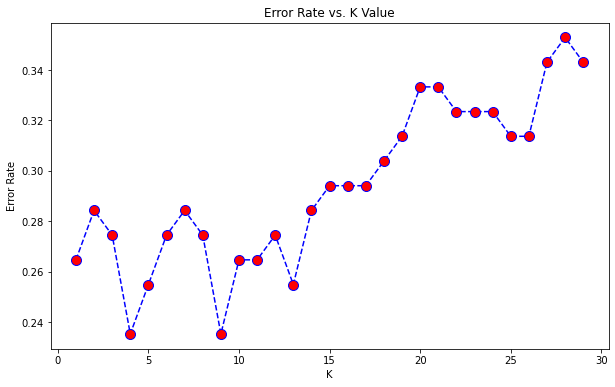

In [57]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, k), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

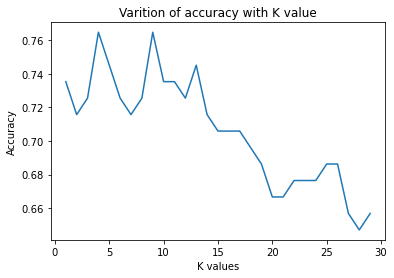

In [58]:
plt.plot(np.arange(1,k),scores)
plt.title('Varition of accuracy with K value')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [59]:
knn = KNeighborsClassifier(n_neighbors = best_k)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))

print("Accuracy for k = {} is {}%".format(best_k,max_accuracy*100))

                      precision    recall  f1-score   support

   Fresh Papaya Leaf       0.93      0.82      0.87        17
    Fruit Black Spot       0.67      0.86      0.75         7
Fruit Powdery Mildew       0.46      0.86      0.60         7
      Fruit Ringspot       0.62      0.53      0.57        15
   Papaya Black Spot       0.86      0.75      0.80        16
    Papaya Leaf Curl       0.67      0.75      0.71         8
     Papaya Ringspot       0.81      0.76      0.79        17
      Powdery Mildew       1.00      0.87      0.93        15

            accuracy                           0.76       102
           macro avg       0.75      0.78      0.75       102
        weighted avg       0.79      0.76      0.77       102

Accuracy for k = 4 is 76.47058823529412%


In [60]:
from sklearn.svm import SVC
svm_model= SVC()
tuned_parameters = {
 'C': (np.arange(1,30)) , 'kernel': ['linear'],
 'C': (np.arange(1,30)) ,  'kernel': ['rbf'],
 'C':(np.arange(1,30)) , 'kernel':['poly']
                   }
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
X_train, X_test, y_train, y_test = train_test_split(features, df['Class'], test_size = 0.2, random_state=None)
model_svm.fit(X_train,y_train)
print('best hyperlink parameters')
print(model_svm.best_params_)
y_pred= model_svm.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_pred,y_test)*100 , "%")


best hyperlink parameters
{'C': 12, 'kernel': 'poly'}
Accuracy Score:
87.8048780487805 %
